In [1]:

#-----------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")
import time as t
from datetime import datetime, timedelta, date 
from dateutil.relativedelta import *
from netCDF4 import Dataset   
import glob
import requests 
import pandas as pd
import xarray as xr
import requests 
import functools
import operator
import wget
import os
import gc
import numpy as np
import pygrib
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.decomposition import PCA
from statsmodels.tsa.stattools import adfuller
import datetime
import holidays
import xarray as xr


import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import shapefile
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import cartopy, cartopy.crs as ccrs   
import regionmask
from shapely.geometry import Point, Polygon

from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker 
import scipy.ndimage as ndimage
from PIL import Image
from glob import glob

import matplotlib.colors as colors
import matplotlib 



#-----METPY---------------------
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
file_med_merge = '/mnt/c/scripts/temas/stream_plot/dado_climato/merge_all_files.grb2'



file = xr.open_dataset(file_med_merge)

#Correção da coordenada time 
#time = start do modelo 
#valid time = tempo de analise e previsão  (time,step)


file = file.stack(valid_time_=['time', 'step']).swap_dims({'valid_time_': 'valid_time'}).drop_vars(['time']).drop(['valid_time_','step'])

lat_slice = slice(20,-90)
file = file.sel(latitude=lat_slice)

file.coords['longitude'] = (file.coords['longitude'] + 180) % 360 - 180 
file = file.sortby(file.longitude)

#Climatologia 
med = file.groupby('valid_time.month').mean()




#save grb2 
med.to_netcdf('./climatology_montlhy_mean_psi200.gbr2')

In [6]:
# extent
lats = 20
latn = -110
lon1 = 160  
lon2 = -180  

extent = [lon1, lon2, lats, latn]  


titulos_mes=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
bacias = ['Madeira',  'Xingu', 'Araguaia', 'Tocantins', 'São Francisco', 'Paranaíba', 'Grande', 'Tietê', 'Paranapanema', 'Alto Paraná', 'Baixo Paraná', 'Iguaçu', 'Uruguai', 'Jacuí', 
'Doce', 'Jequitinhonha', 'Paraíba do Sul']
modelo_name=['CFSv2']


In [7]:
root='/mnt/c/scripts/relatorio_clientes/resultados/'
dir='/mnt/c/scripts/dados_plot'

bacias = ['Madeira',  'Xingu', 'Araguaia', 'Tocantins', 'São Francisco', 'Paranaíba', 'Grande', 'Tietê', 'Paranapanema', 'Alto Paraná', 'Baixo Paraná', 'Iguaçu', 'Uruguai', 'Jacuí', 'Doce', 'Jequitinhonha', 'Paraíba do Sul']

def contornos(dir, i, ax):
      
  shapefile = list(shpreader.Reader(dir + '/shapes/br_unidades_da_federacao/BR_UF_2019.shp').geometries())
  ax[i].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.25)

  america =list(shpreader.Reader(dir + '/shapes/world-coastline/world-coastline-110-million.shp').geometries())
  ax[i].add_geometries(america, ccrs.PlateCarree(), edgecolor='gray', facecolor='none', linewidth=0.25)
              
  america2 =list(shpreader.Reader(dir + '/shapes/america_do_sul/a__031_001_americaDoSul.shp').geometries())
  ax[i].add_geometries(america2, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.25)

  ax[i].coastlines(resolution='10m', color='black', linewidth=0.8)
  ax[i].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
  
def centroid(key, bacia_name):

    if key == 'Alto Paraná':

        lat_shape=bacia_name.geometry.centroid.y
        lon_shape=bacia_name.geometry.centroid.x - 1.5

    elif key == 'Araguaia':

        lat_shape=bacia_name.geometry.centroid.y 
        lon_shape=bacia_name.geometry.centroid.x -0.5

    elif key == 'Baixo Paraná':

        lat_shape=bacia_name.geometry.centroid.y - 0.75
        lon_shape=bacia_name.geometry.centroid.x - 0.60

    elif key == 'Doce':
        lat_shape=bacia_name.geometry.centroid.y 
        lon_shape=bacia_name.geometry.centroid.x  - 0.5

    elif key == 'Grande':

        lat_shape=bacia_name.geometry.centroid.y - 0.30
        lon_shape=bacia_name.geometry.centroid.x - 0.75

    elif key == 'Iguaçu':

        lat_shape=bacia_name.geometry.centroid.y - 0.25
        lon_shape=bacia_name.geometry.centroid.x - 0.75

    elif key == 'Jacuí':
        lat_shape=bacia_name.geometry.centroid.y - 0.15
        lon_shape=bacia_name.geometry.centroid.x - 0.1

    elif key == 'Jequitinhonha':
        lat_shape=bacia_name.geometry.centroid.y
        lon_shape=bacia_name.geometry.centroid.x - 0.5

    elif key == 'Madeira':  
        lat_shape=bacia_name.geometry.centroid.y
        lon_shape=bacia_name.geometry.centroid.x

    elif key == 'Paraíba do Sul':

        lat_shape=bacia_name.geometry.centroid.y
        lon_shape=bacia_name.geometry.centroid.x - 0.1

    elif key == 'Paranaíba':

        lat_shape=bacia_name.geometry.centroid.y
        lon_shape=bacia_name.geometry.centroid.x -0.5

    elif key == 'Paranapanema':

        lat_shape=bacia_name.geometry.centroid.y - 0.75
        lon_shape=bacia_name.geometry.centroid.x - 0.40

    elif key =='São Francisco':

        lat_shape=bacia_name.geometry.centroid.y - 0.5
        lon_shape=bacia_name.geometry.centroid.x - 1.5

    elif key =='Tietê':

        lat_shape=bacia_name.geometry.centroid.y - 0.75
        lon_shape=bacia_name.geometry.centroid.x - 0.05

    elif key =='Tocantins':

        lat_shape=bacia_name.geometry.geometry.centroid.y
        lon_shape=bacia_name.geometry.geometry.centroid.x -1.0

    elif key =='Uruguai':

        lat_shape=bacia_name.geometry.centroid.y - 0.4
        lon_shape=bacia_name.geometry.centroid.x -1.0

    elif key == 'Xingu':

        lat_shape=bacia_name.geometry.centroid.y
        lon_shape=bacia_name.geometry.centroid.x -0.2


    return lat_shape,lon_shape

In [10]:
mes_1 = med.sel(month = 7)
mes_1

<xarray.Dataset>
Dimensions:        (latitude: 221, longitude: 720)
Coordinates:
    isobaricInhPa  float64 200.0
  * latitude       (latitude) float64 20.0 19.5 19.0 18.5 ... -89.0 -89.5 -90.0
  * longitude      (longitude) float64 -180.0 -179.5 -179.0 ... 179.0 179.5
    month          int64 7
Data variables:
    strf           (latitude, longitude) float32 -3.13e+07 ... 1.52e+08
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-06-16T12:42 GRIB to CDM+CF via cfgrib-0.9.1...

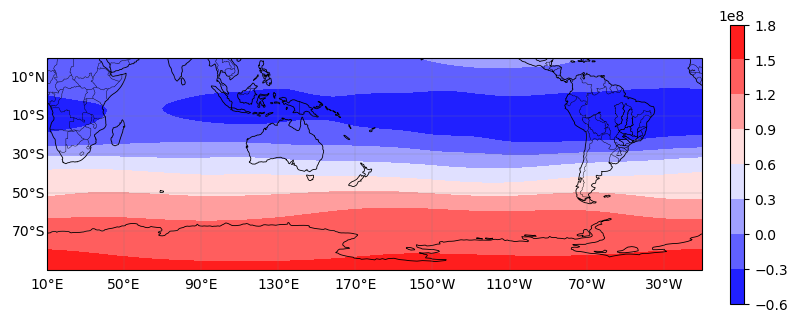

In [15]:
lats = 20
latn = -110
lon1 = 160  
lon2 = -180   

plt.figure(figsize=[9,6])                            

proj = ccrs.PlateCarree(central_longitude=190)    

ax = plt.axes(projection=proj)   

ax.set_extent([lon1, lon2, lats, latn], proj)  

ax.coastlines( color='black',linewidth=0.6)

ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.3)


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                  xlocs=np.arange(-150,180,40), ylocs=np.arange(-90, 40,20), 
                  x_inline=False, y_inline=False, linewidth=0.33, color='gray',alpha=0.5)


cf = ax.contourf(mes_1.longitude,mes_1.latitude, mes_1.strf, cmap='bwr')
cb2=plt.colorbar(cf,fraction=0.02, pad=0.04)



gl.right_labels = False
gl.top_labels = False


for key in bacias:

        bacia_name=gpd.read_file(dir + '/shapes/bacias/' + key.lower().replace(' ', '_') + '-tok2.shp')

        ax.add_geometries(bacia_name.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black',linewidth = 0.25)
